In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv('http://bit.ly/kaggletrain')
df0.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

## Titanic Data Analysis & Plot

In [32]:
# Datatype - DataFrame, Series, String

print(type(df0))
print(type(df0.Name))
print(type(df0.Name[0]))

df0.dtypes
df0.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df0.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

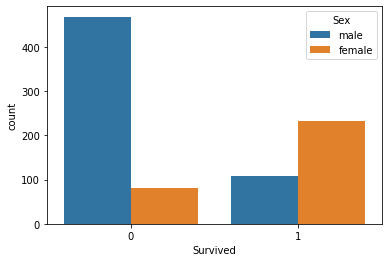

In [11]:
sns.countplot(x="Survived", hue="Sex", data=df0)

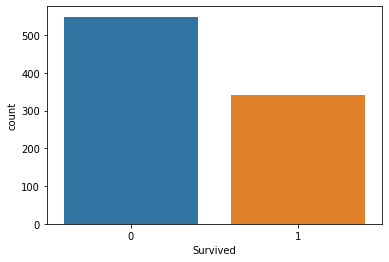

In [13]:
sns.countplot(x="Survived", data=df0)

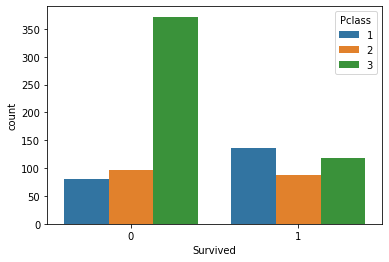

In [14]:
sns.countplot(x="Survived", hue="Pclass", data=df0)

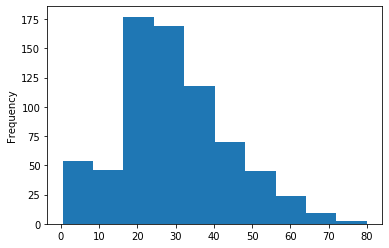

In [15]:
df0['Age'].plot.hist()

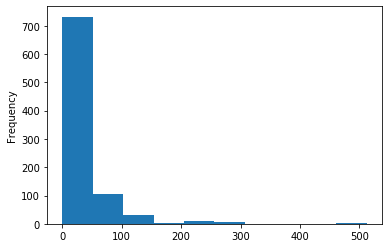

In [16]:
df0['Fare'].plot.hist()

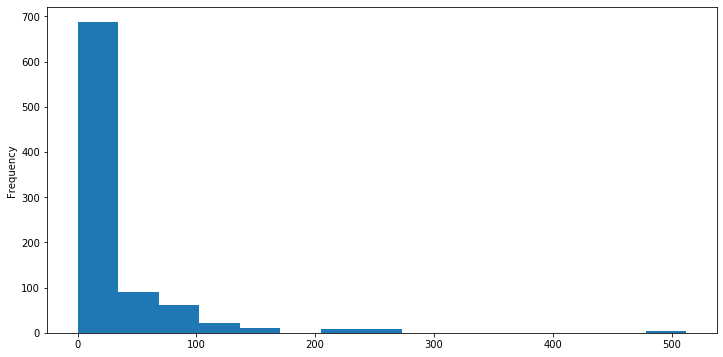

In [25]:
df0['Fare'].plot.hist(bins=15, figsize=(12,6))

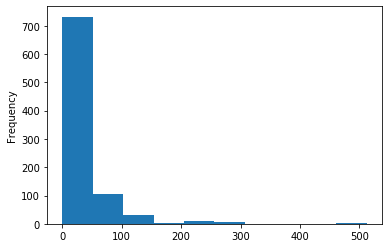

In [21]:
df0['Fare'].plot.hist(bins=10)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

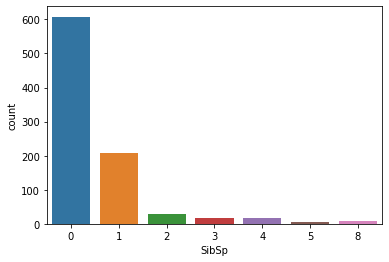

In [144]:
sns.countplot(x="SibSp", data=df0)
df0.SibSp.value_counts()

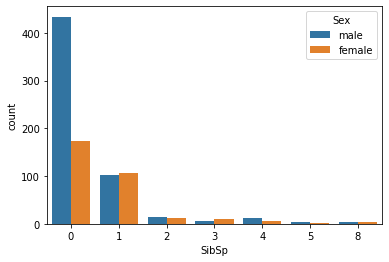

In [39]:
sns.countplot(x="SibSp", hue="Sex", data=df0)

## Data Wrangling

In [42]:
df0.isnull().head()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False

In [43]:
df0.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

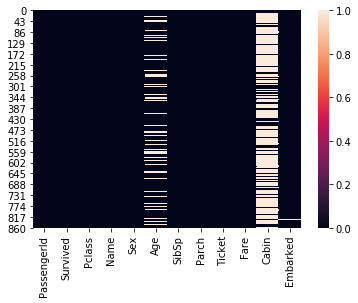

In [44]:
sns.heatmap(df0.isnull())

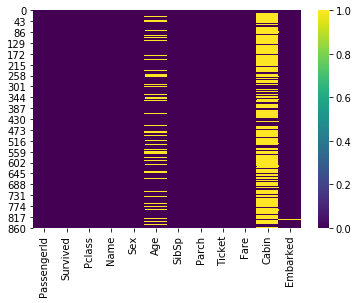

In [52]:
sns.heatmap(df0.isnull(), cmap="viridis")

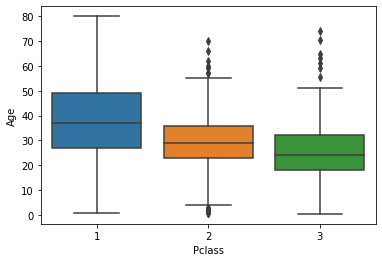

In [54]:
sns.boxplot(x="Pclass", y="Age", data=df0)

In [115]:
# is all this too hard? don't worry we have a quick and easy way. Pass df instead of Series to get_dummies method
df1=pd.get_dummies(df0, columns=['Pclass','Sex', 'Embarked'], drop_first=True)
df1

PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
..           ...       ...                                                ...   
886          887         0                              Montvila, Rev. Juozas   
887          888         1                       Graham, Miss. Margaret Edith   
888          889         0           Johnston, Miss. Catherine Helen "Carrie"   
889          890         1                              Behr, Mr. Karl Howell   
890          891         0                                Dooley, Mr. Patrick   

      Age  SibSp  Parch            Ticket     Fare Cabin  Pclass_2  Pclass_3  \
0    22.0      1      0         A/5 21171   7.2500   NaN         0         1   
1    38.0      1      0          PC 17599  71.2833   C85         0         0   
2    26.0      0      0  STON/O2. 3101282   7.9250   NaN         0         1   
3    35.0      1      0            113803  53.1000  C123         0         0   
4    35.0      0      0            373450   8.0500   NaN         0         1   
..    ...    ...    ...               ...      ...   ...       ...       ...   
886  27.0      0      0            211536  13.0000   NaN         1         0   
887  19.0      0      0            112053  30.0000   B42         0         0   
888   NaN      1      2        W./C. 6607  23.4500   NaN         0         1   
889  26.0      0      0            111369  30.0000  C148         0         0   
890  32.0      0      0            370376   7.7500   NaN         0         1   

     Sex_male  Embarked_Q  Embarked_S  
0           1           0           1  
1           0           0           0  
2           0           0           1  
3           0           0           1  
4           1           0           1  
..        ...         ...         ...  
886         1           0           1  
887         0           0           1  
888         0           0           1  
889         1           0           0  
890         1           1           0  

[891 rows x 14 columns]

In [116]:
df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis='columns', inplace=True)
df1.dropna(inplace=True)

In [61]:
df1.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [62]:
df1.head()

Survived   Age  SibSp  Parch     Fare Cabin  Pclass_2  Pclass_3  Sex_male  \
1          1  38.0      1      0  71.2833   C85         0         0         0   
3          1  35.0      1      0  53.1000  C123         0         0         0   
6          0  54.0      0      0  51.8625   E46         0         0         1   
10         1   4.0      1      1  16.7000    G6         0         1         0   
11         1  58.0      0      0  26.5500  C103         0         0         0   

    Embarked_Q  Embarked_S  
1            0           0  
3            0           1  
6            0           1  
10           0           1  
11           0           1

## Training and Testing with Data

In [122]:
X=df1.drop('Survived',axis='columns')
y=df1.Survived

In [123]:
# OLD code from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_learn, X_actual, y_learn, y_actual = train_test_split(X, y, test_size=0.25)
X_learn, X_actual, y_learn, y_actual = train_test_split(X, y, test_size=0.25, random_state=1)

In [124]:
X_learn

Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
813   6.0      4      2  31.2750         0         1         0           0   
448   5.0      2      1  19.2583         0         1         0           0   
145  19.0      1      1  36.7500         1         0         1           0   
880  25.0      0      1  26.0000         1         0         0           0   
310  24.0      0      0  83.1583         0         0         0           0   
..    ...    ...    ...      ...       ...       ...       ...         ...   
179  36.0      0      0   0.0000         0         1         1           0   
808  39.0      0      0  13.0000         1         0         1           0   
93   26.0      1      2  20.5750         0         1         1           0   
291  19.0      1      0  91.0792         0         0         0           0   
51   21.0      0      0   7.8000         0         1         1           0   

     Embarked_S  
813           1  
448           0  
145           1  
880           1  
310           0  
..          ...  
179           1  
808           1  
93            1  
291           0  
51            1  

[535 rows x 9 columns]

In [119]:
X_actual

Age  SibSp  Parch      Fare        Cabin  Pclass_2  Pclass_3  Sex_male  \
96   71.00      0      0   34.6542           A5         0         0         1   
867  31.00      0      0   50.4958          A24         0         0         1   
331  45.50      0      0   28.5000         C124         0         0         1   
230  35.00      1      0   83.4750          C83         0         0         0   
782  29.00      0      0   30.0000           D6         0         0         1   
741  36.00      1      0   78.8500          C46         0         0         1   
486  35.00      1      0   90.0000          C93         0         0         0   
857  51.00      0      0   26.5500          E17         0         0         1   
205   2.00      0      1   10.4625           G6         0         1         0   
297   2.00      1      2  151.5500      C22 C26         0         0         0   
571  53.00      2      0   51.4792         C101         0         0         0   
305   0.92      1      2  151.5500      C22 C26         0         0         1   
11   58.00      0      0   26.5500         C103         0         0         0   
715  19.00      0      0    7.6500        F G73         0         1         1   
394  24.00      0      2   16.7000           G6         0         1         0   
183   1.00      2      1   39.0000           F4         1         0         1   
263  40.00      0      0    0.0000          B94         0         0         1   
618   4.00      2      1   39.0000           F4         1         0         0   
516  34.00      0      0   10.5000          F33         1         0         0   
515  47.00      0      0   34.0208          D46         0         0         1   
268  58.00      0      1  153.4625         C125         0         0         0   
62   45.00      1      0   83.4750          C83         0         0         1   
523  44.00      0      1   57.9792          B18         0         0         0   
377  27.00      0      2  211.5000          C82         0         0         1   
572  36.00      0      0   26.3875          E25         0         0         1   
88   23.00      3      2  263.0000  C23 C25 C27         0         0         0   
248  37.00      1      1   52.5542          D35         0         0         1   
174  56.00      0      0   30.6958           A7         0         0         1   
110  47.00      0      0   52.0000         C110         0         0         1   
412  33.00      1      0   90.0000          C78         0         0         0   
779  43.00      0      1  211.3375           B3         0         0         0   
737  35.00      0      0  512.3292         B101         0         0         1   
504  16.00      0      0   86.5000          B79         0         0         0   
662  47.00      0      0   25.5875          E58         0         0         1   
460  48.00      0      0   26.5500          E12         0         0         1   
292  36.00      0      0   12.8750            D         1         0         1   
641  24.00      0      0   69.3000          B35         0         0         0   
310  24.00      0      0   83.1583          C54         0         0         0   
345  24.00      0      0   13.0000          F33         1         0         0   
583  36.00      0      0   40.1250          A10         0         0         1   
701  35.00      0      0   26.2875          E24         0         0         1   
577  39.00      1      0   55.9000          E44         0         0         0   
97   23.00      0      1   63.3583      D10 D12         0         0         1   
21   34.00      0      0   13.0000          D56         1         0         1   
630  80.00      0      0   30.0000          A23         0         0         1   
587  60.00      1      1   79.2000          B41         0         0         1   
453  49.00      1      0   89.1042          C92         0         0         1   

     Embarked_Q  Embarked_S  
96            0           0  
867           0           1  
331           0           1 

In [125]:
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression()
lrModel.fit(X_learn, y_learn)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_predict = lrModel.predict(X_actual)

In [138]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_actual, y_predict))

[[98 14]
 [25 42]]


In [139]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_actual, y_predict)) #(98+42)/(98+14+25+42)

0.7821229050279329


In [134]:
from sklearn.metrics import classification_report 
print(classification_report(y_actual, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       112
           1       0.75      0.63      0.68        67

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.78      0.78      0.78       179



In [145]:
X_actual.shape

(179, 9)

In [146]:
X_learn.head()

Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
813   6.0      4      2  31.2750         0         1         0           0   
448   5.0      2      1  19.2583         0         1         0           0   
145  19.0      1      1  36.7500         1         0         1           0   
880  25.0      0      1  26.0000         1         0         0           0   
310  24.0      0      0  83.1583         0         0         0           0   

     Embarked_S  
813           1  
448           0  
145           1  
880           1  
310           0

In [143]:
X_learn.shape

(535, 9)

In [147]:
lrModel.intercept_

array([2.63521327])

In [148]:
lrModel.coef_

array([[-0.02286588, -0.2486074 , -0.04154504,  0.00544114, -0.6403361 ,
        -1.53946327, -2.35298345, -0.64740622, -0.05599283]])

In [149]:
print('Y-Intercept: '+ str(lrModel.intercept_) + '\n\nX-Cofficient: \n' + str(lrModel.coef_))

Y-Intercept: [2.63521327]

X-Cofficient: 
[[-0.02286588 -0.2486074  -0.04154504  0.00544114 -0.6403361  -1.53946327
  -2.35298345 -0.64740622 -0.05599283]]


In [154]:
from sklearn.metrics import mean_squared_error, r2_score
print ('Mean Square error is: %.12f' % mean_squared_error(y_actual, y_predict))
print (mean_squared_error(y_actual, y_predict))

print ('Linear Regression Score is: %.12f' % lrModel.score(X_actual, y_actual))
print ('Cofficient of Dermination: %.12f' % r2_score(y_actual, y_predict))

Mean Square error is: 0.217877094972
0.21787709497206703
Linear Regression Score is: 0.782122905028
Cofficient of Dermination: 0.069696162047
